In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
# Read in Data
df = pd.read_csv('./data/clean/train.csv')
df.head()

,year-month,route,passengers,seat_capacity,num_of_flights,dist_miles,pop_origin,pop_dest,airfare,fuel_usd_pergallon
0,1996-01-31,"Albany, NY - Chicago, IL",10985,18579,175,723.000000,825245,17287860,273.90,0.55
1,1996-01-31,"Albuquerque, NM - Chicago, IL",5203,8604,62,1119.500000,680994,17287860,156.16,0.55
2,1996-01-31,"Albuquerque, NM - Dallas, TX",43467,69323,494,573.714286,680994,8994450,89.76,0.55
3,1996-01-31,"Albuquerque, NM - Houston, TX",13017,22992,186,750.000000,680994,4268132,104.98,0.55
4,1996-01-31,"Albuquerque, NM - Las Vegas, NV",16010,29919,223,487.000000,680994,1044023,77.06,0.55


In [230]:
df.index = pd.to_datetime(df['year-month'])
df = df.drop(columns=['year-month'])
df.head()

,route,passengers,seat_capacity,num_of_flights,dist_miles,pop_origin,pop_dest,airfare,fuel_usd_pergallon
year-month,,,,,,,,,
1996-01-31,"Albany, NY - Chicago, IL",10985,18579,175,723.000000,825245,17287860,273.90,0.55
1996-01-31,"Albuquerque, NM - Chicago, IL",5203,8604,62,1119.500000,680994,17287860,156.16,0.55
1996-01-31,"Albuquerque, NM - Dallas, TX",43467,69323,494,573.714286,680994,8994450,89.76,0.55
1996-01-31,"Albuquerque, NM - Houston, TX",13017,22992,186,750.000000,680994,4268132,104.98,0.55
1996-01-31,"Albuquerque, NM - Las Vegas, NV",16010,29919,223,487.000000,680994,1044023,77.06,0.55


In [231]:
# Check Datatypes & Nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50292 entries, 1996-01-31 to 2006-12-31
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   route               50292 non-null  object 
 1   passengers          50292 non-null  int64  
 2   seat_capacity       50292 non-null  int64  
 3   num_of_flights      50292 non-null  int64  
 4   dist_miles          50292 non-null  float64
 5   pop_origin          50292 non-null  int64  
 6   pop_dest            50292 non-null  int64  
 7   airfare             50292 non-null  float64
 8   fuel_usd_pergallon  50292 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 3.8+ MB


In [232]:
# Examine distributions
df.describe()

,passengers,seat_capacity,num_of_flights,dist_miles,pop_origin,pop_dest,airfare,fuel_usd_pergallon
count,50292.000000,50292.000000,50292.000000,50292.000000,5.029200e+04,5.029200e+04,50292.000000,50292.000000
mean,29769.310646,42783.870874,333.014038,925.264717,7.925186e+06,7.217721e+06,182.535722,0.903136
std,24929.751104,36296.975475,289.282297,568.078101,8.363870e+06,9.164133e+06,69.977075,0.492705
min,0.000000,120.000000,0.000000,129.000000,2.134960e+05,2.349460e+05,65.540000,0.304000
25%,12834.500000,18576.000000,150.000000,491.000000,1.753337e+06,1.584226e+06,125.852500,0.556750
50%,22103.000000,31693.500000,246.000000,802.000000,4.555490e+06,2.791682e+06,171.240000,0.745500
75%,38013.500000,54012.250000,415.000000,1158.000000,1.042520e+07,9.475022e+06,233.265000,1.029000
max,201251.000000,311200.000000,2919.000000,2704.000000,3.765127e+07,3.765127e+07,504.320000,2.398000


In [233]:
df.index.max()

Timestamp('2006-12-31 00:00:00')

In [234]:
df.head()

,route,passengers,seat_capacity,num_of_flights,dist_miles,pop_origin,pop_dest,airfare,fuel_usd_pergallon
year-month,,,,,,,,,
1996-01-31,"Albany, NY - Chicago, IL",10985,18579,175,723.000000,825245,17287860,273.90,0.55
1996-01-31,"Albuquerque, NM - Chicago, IL",5203,8604,62,1119.500000,680994,17287860,156.16,0.55
1996-01-31,"Albuquerque, NM - Dallas, TX",43467,69323,494,573.714286,680994,8994450,89.76,0.55
1996-01-31,"Albuquerque, NM - Houston, TX",13017,22992,186,750.000000,680994,4268132,104.98,0.55
1996-01-31,"Albuquerque, NM - Las Vegas, NV",16010,29919,223,487.000000,680994,1044023,77.06,0.55


In [235]:
# top 5 routes by frequency
enter_year = 2006

df[str(enter_year)].groupby('route')[['passengers', 'seat_capacity', 'num_of_flights']].sum().sort_values(by=['num_of_flights'],
                                                                                                          ascending=False).head(10)

,passengers,seat_capacity,num_of_flights
route,,,
"Dallas, TX - Houston, TX",1597094,2247730,23903
"Boston, MA - New York, NY",1156125,1902661,20388
"New York, NY - Washington, DC",1097632,1826493,19902
"Chicago, IL - New York, NY",1599779,2021458,16755
"Boston, MA - Washington, DC",894740,1395717,15482
"Chicago, IL - Minneapolis, MN",1290563,1707621,14984
"Chicago, IL - Washington, DC",1307565,1809409,14541
"Atlanta, GA - Washington, DC",1284830,1766376,14522
"Atlanta, GA - Chicago, IL",1118470,1526132,14410


In [236]:
# Dallas, TX - Houston, TX will be our sample route
# This will show 14 years of flight data by month
dal_hou = df[df['route'] == 'Dallas, TX - Houston, TX'].copy()
print(dal_hou.shape)
dal_hou.head()

(132, 9)


,route,passengers,seat_capacity,num_of_flights,dist_miles,pop_origin,pop_dest,airfare,fuel_usd_pergallon
year-month,,,,,,,,,
1996-01-31,"Dallas, TX - Houston, TX",171953,303705,2870,229.586207,8994450,4268132,78.20,0.550
1996-02-29,"Dallas, TX - Houston, TX",170314,281305,2684,228.793103,8994450,4268132,78.20,0.557
1996-03-31,"Dallas, TX - Houston, TX",201251,301331,2877,229.777778,8994450,4268132,78.20,0.586
1996-04-30,"Dallas, TX - Houston, TX",179483,293973,2801,229.225806,8994450,4268132,76.01,0.617
1996-05-31,"Dallas, TX - Houston, TX",190072,298747,2837,230.709677,8994450,4268132,76.01,0.557


In [237]:
round(dal_hou.shape[0]*.80)

106

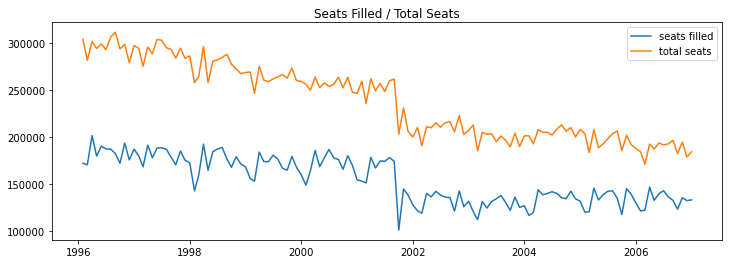

In [238]:
plt.figure(figsize=(12, 4))
plt.plot(dal_hou['passengers'], label='seats filled')
plt.plot(dal_hou['seat_capacity'], label='total seats')
plt.legend()
plt.title('Seats Filled / Total Seats');


In [239]:
dal_hou.columns

Index(['route', 'passengers', 'seat_capacity', 'num_of_flights', 'dist_miles',
       'pop_origin', 'pop_dest', 'airfare', 'fuel_usd_pergallon'],
      dtype='object')

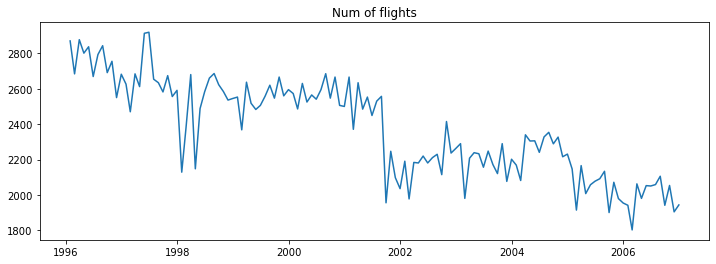

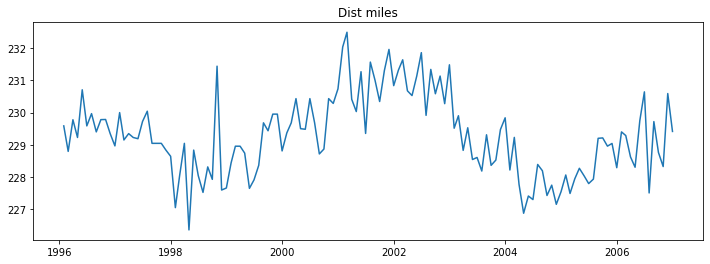

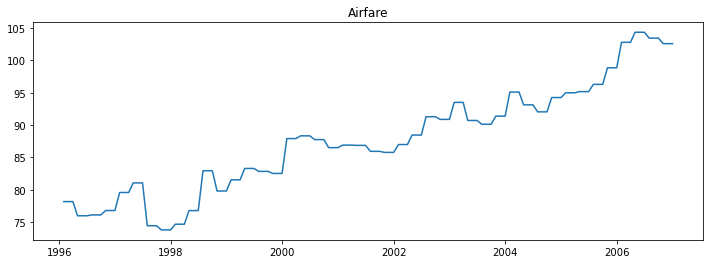

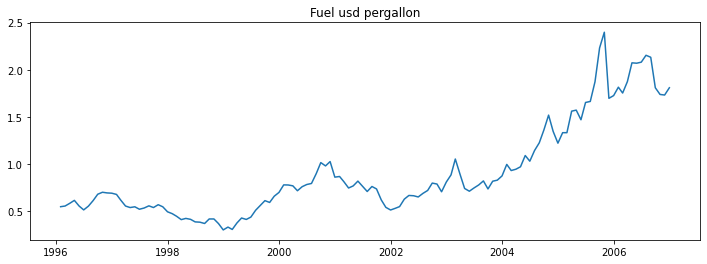

In [240]:
for i in dal_hou[['num_of_flights', 'dist_miles', 'airfare', 'fuel_usd_pergallon']].columns:
    plt.figure(figsize=(12,4))
    plt.plot(dal_hou[i])
    plt.title(i.replace('_', " ").capitalize())

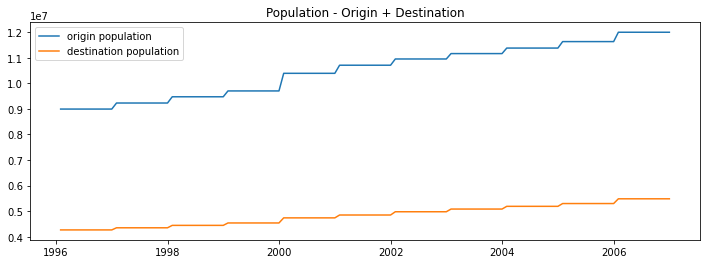

In [241]:
plt.figure(figsize=(12, 4))
plt.plot(dal_hou['pop_origin'], label='origin population')
plt.plot(dal_hou['pop_dest'], label='destination population')
plt.legend()
plt.title('Population - Origin + Destination');

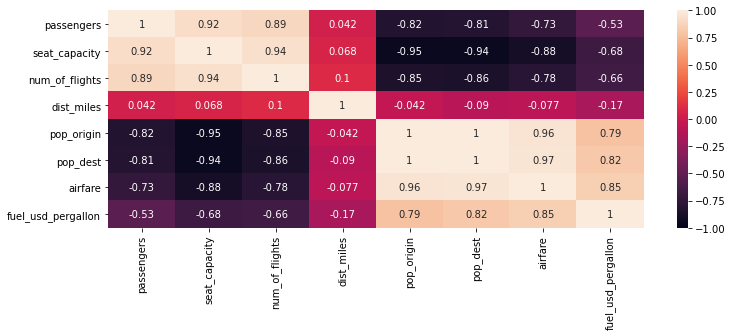

In [242]:
plt.figure(figsize=(12, 4))
sns.heatmap(data = dal_hou.corr(), annot=True, vmin=-1.0, vmax=1.0);

## .rolling( )

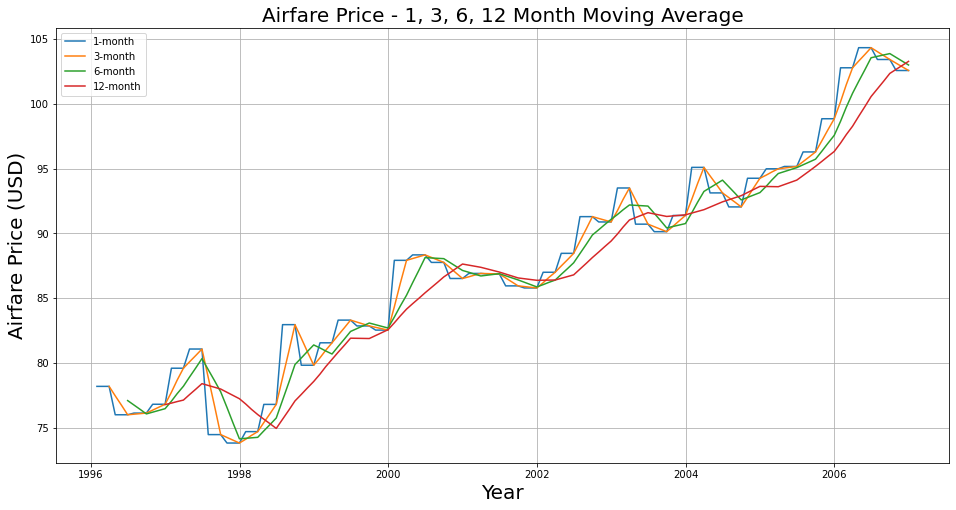

In [243]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlabel('Year', size=20)
plt.ylabel('Airfare Price (USD)', size=20)
plt.plot(dal_hou['airfare'].rolling(1).mean(), label='1-month') # same as not having .rolling(1).mean()
plt.plot(dal_hou['airfare'].rolling(3).mean(), label='3-month')
plt.plot(dal_hou['airfare'].rolling(6).mean(), label='6-month')
plt.plot(dal_hou['airfare'].rolling(12).mean(), label='12-month')
plt.title('Airfare Price - 1, 3, 6, 12 Month Moving Average', size=20)
plt.legend();

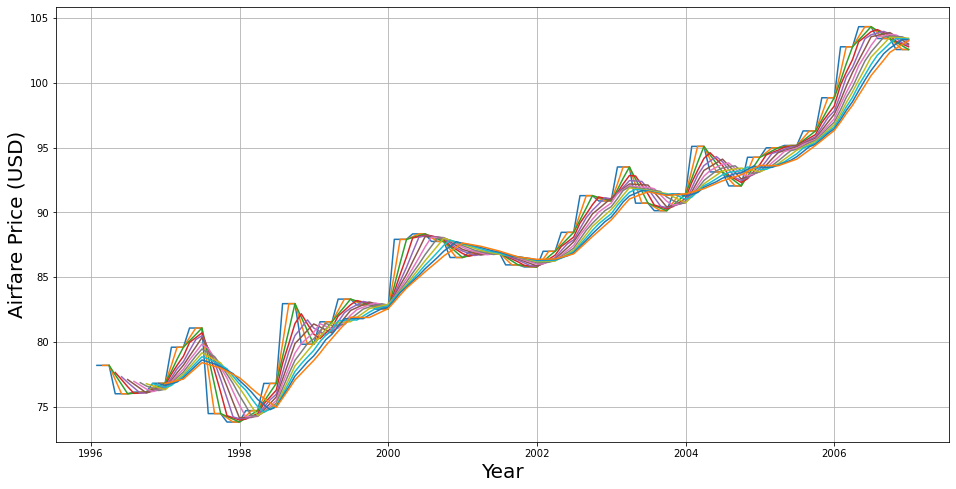

In [244]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlabel('Year', size=20)
plt.ylabel('Airfare Price (USD)', size=20)
plt.xticks()
for i in range(1, 13): # 1 month, 2 month....12 months
    plt.plot(dal_hou['airfare'].rolling(i).mean());

## .diff( )

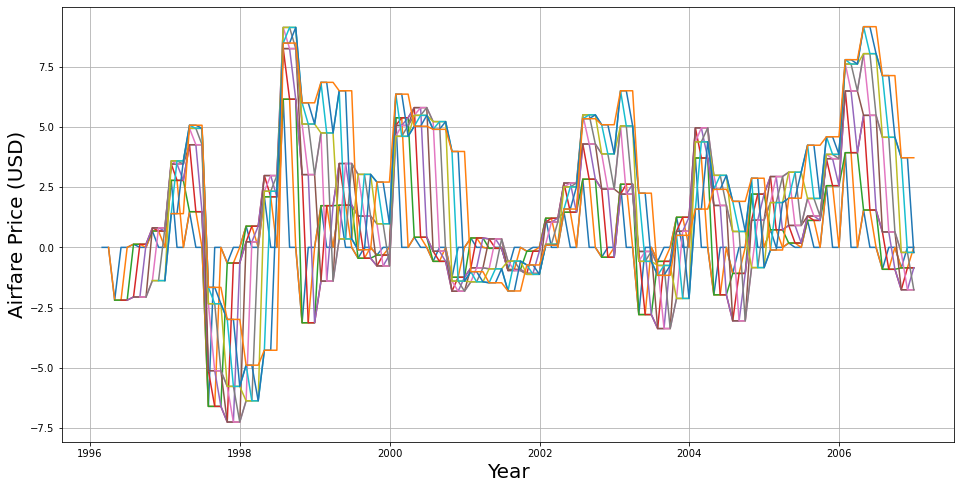

In [245]:
# diff().diff() is different than .diff(1) and .diff(2)
# this below isn't as import as below where we are making our data stationary

plt.figure(figsize=(16,8))
plt.grid()
plt.xlabel('Year', size=20)
plt.ylabel('Airfare Price (USD)', size=20)
plt.xticks()
for i in range(1, 13): # 1 month, 2 month....12 months
    plt.plot(dal_hou['airfare'].diff(i));

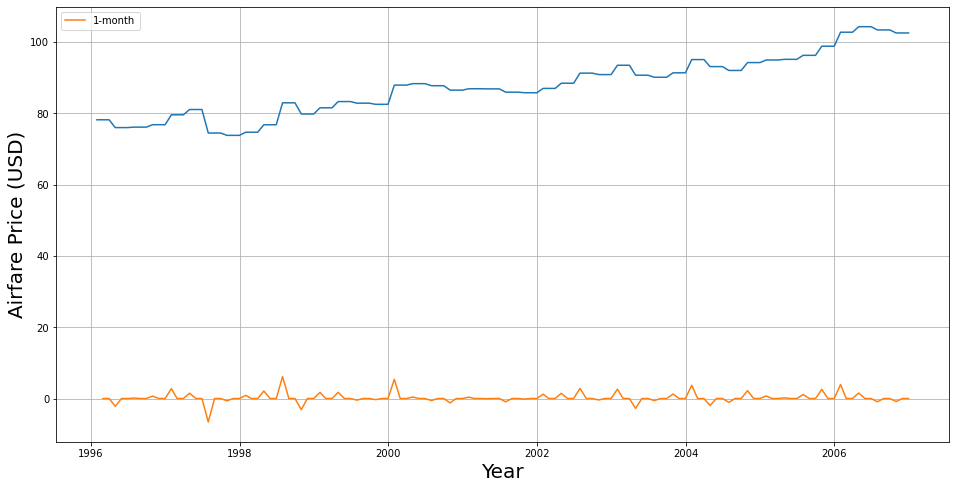

In [246]:
i = 1
plt.figure(figsize=(16,8))
plt.grid()
plt.xlabel('Year', size=20)
plt.ylabel('Airfare Price (USD)', size=20)
plt.plot(dal_hou['airfare'])
plt.plot(dal_hou['airfare'].diff(i), label=str(i)+'-month') # select i to see what looks most stationary
# plt.plot(dal_hou['airfare'].diff(i).diff(i), label=str(i*2)+'-month')
# plt.plot(dal_hou['airfare'].diff(i).diff(i).diff(i), label=str(i*3)+'-month')
plt.title('', size=20)
plt.legend();

## .pct_change( )

In [247]:
dal_hou['airfare'].pct_change(1)

year-month
1996-01-31         NaN
1996-02-29    0.000000
1996-03-31    0.000000
1996-04-30   -0.028005
1996-05-31    0.000000
                ...   
2006-08-31    0.000000
2006-09-30    0.000000
2006-10-31   -0.008220
2006-11-30    0.000000
2006-12-31    0.000000
Name: airfare, Length: 132, dtype: float64

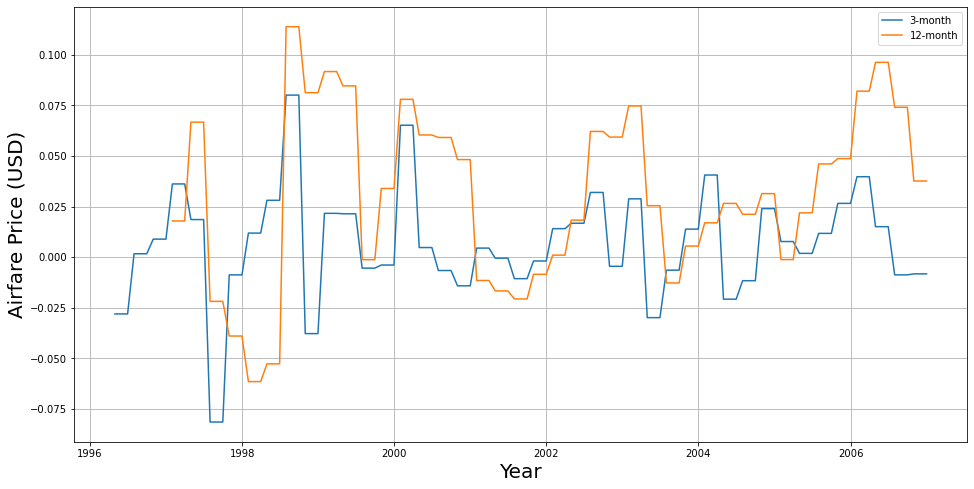

In [248]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlabel('Year', size=20)
plt.ylabel('Airfare Price (USD)', size=20)
plt.plot(dal_hou['airfare'].pct_change(3), label='3-month')
# plt.plot(dal_hou['airfare'].pct_change(6), label='6-month')
# plt.plot(dal_hou['airfare'].pct_change(9), label='9-month')
plt.plot(dal_hou['airfare'].pct_change(12), label='12-month')
plt.title('', size=20)
plt.legend();

## EDA for pre-processing / feature creation

To identify trends or seasonality in a new time series you should:
- generate a time plot.
- generate the autocorrelation plot.
- generate the partial autocorrelation plot.

## IDENTIFY PATTERNS - Airfare

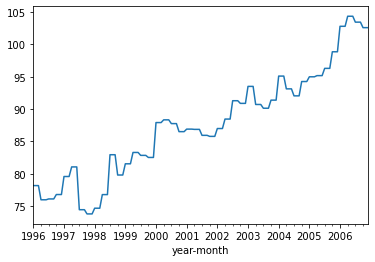

In [292]:
# Is there evidence of a trend in timeplot?  If so, describe...linear, exponential?  How can you tell?
# Is there evidence of seasonality? If so, estimate the frequency....how often?  How can you tell?

dal_hou['airfare'].plot();

### Decompose Plot

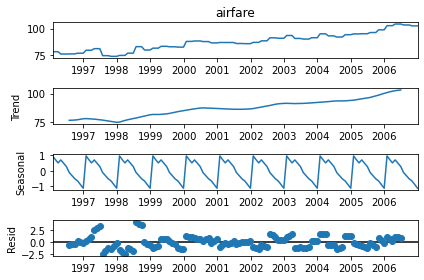

In [267]:
# Seasonal Decompose Plot Import
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(dal_hou['airfare'])

# Plot the decomposed time series.
decomp.plot();

In [273]:
# Create lag columns / features and look at correlation between variable and itself
dal_hou['airfare_lag_1'] = dal_hou['airfare'].shift(1)
dal_hou['airfare_lag_2'] = dal_hou['airfare'].shift(2)
dal_hou['airfare_lag_3'] = dal_hou['airfare'].shift(3)

# Check out correlations - High correlations will help inform us of what to include in our model
dal_hou[['airfare', 'airfare_lag_1', 'airfare_lag_2', 'airfare_lag_3']].corr()

,airfare,airfare_lag_1,airfare_lag_2,airfare_lag_3
airfare,1.000000,0.987065,0.974250,0.961569
airfare_lag_1,0.987065,1.000000,0.986724,0.973568
airfare_lag_2,0.974250,0.986724,1.000000,0.986359
airfare_lag_3,0.961569,0.973568,0.986359,1.000000


### ACF Plot
- **We can use it to detect trends**: When the autocorrelation plot has large and positive values for small lags (e.g. lags 1, 2, 3), this is evidence that a trend exists.
- **We can use it to detect seasonality**: Recall that seasonality means we have fluctuations in our $Y$ variable that occur with a fixed and known frequency. When the autocorrelation plot has larger values for the seasonal lags than other lags, this is evidence that seasonality exists. (Visually, this might look like a scalloped shape.)
- **We can use this plot to inform our modeling choices**, along with a related plot - the partial autocorrelation function plot.

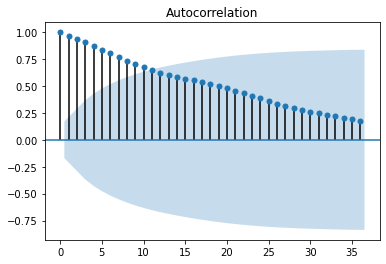

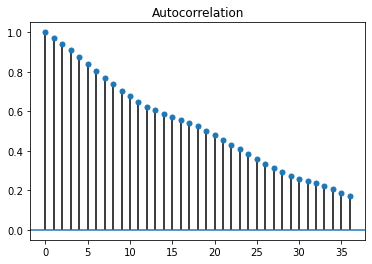

In [285]:
# autocorrelation function (ACF) plot import
from statsmodels.graphics.tsaplots import plot_acf

# Generate the ACF plot on data -- choose the number of lags on your own
plot_acf(dal_hou['airfare'], lags=36, alpha=0.05);

# Generate the ACF plot on data -- Set alpha to None to remove the default confidence interval 95% (0.05)
plot_acf(dal_hou['airfare'], lags=36, alpha=None);

### PACF Plot
- **We can use it to detect seasonality**: Recall that seasonality means we have fluctuations in our $Y$ variable that occur with a fixed and known frequency. When the partial autocorrelation plot has significant values for the seasonal lags, this is evidence that seasonality exists.
- **We can use this plot to inform our modeling choices**: Here, we see that by using $Y_{t-1}$ as a predictor for $Y_t$, we probably won't get much important information if we were to also include $Y_{t-2}$ (or higher order lags) as a predictor.

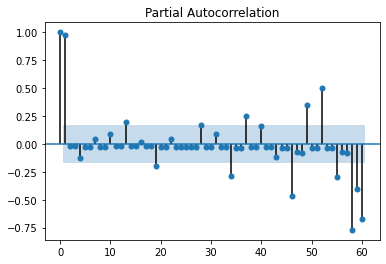

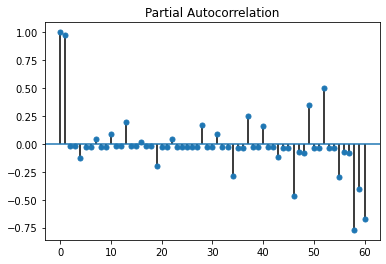

In [278]:
# Import the partial autocorrelation function (PACF) plot.
from statsmodels.graphics.tsaplots import plot_pacf

# blue area shows 95% confidence interval & anything outside the blue band is a statistically significant correlation.
plot_pacf(dal_hou['airfare'], lags=60, alpha=0.05)
plot_pacf(dal_hou['airfare'], lags=60, alpha=None);

#### Conclusions - AIRFARE
- **ACF Trend Detection:**  Looks like a trend does exist.  10 lags are above the shaded area
- **ACF Seasonality Detection:**  Looks like this ACF plot does not show seasonality.
- **PACF Seasonality Detection:** Looks like the PACF plot shows seasonality every 6 and 12 months.

## IDENTIFY PATTERNS - Passengers

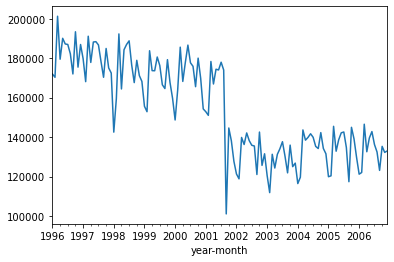

In [279]:
dal_hou['passengers'].plot();

### Decompose Plot

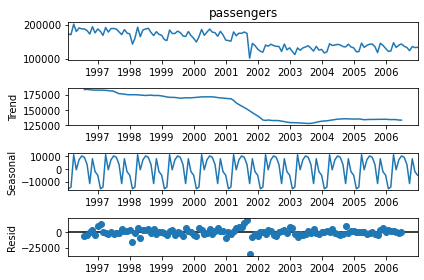

In [281]:
# Seasonal Decompose Plot Import
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(dal_hou['passengers'])

# Plot the decomposed time series.
decomp.plot();

In [282]:
# Create lag columns / features and look at correlation between variable and itself
dal_hou['passengers_lag_1'] = dal_hou['passengers'].shift(1)
dal_hou['passengers_lag_2'] = dal_hou['passengers'].shift(2)
dal_hou['passengers_lag_3'] = dal_hou['passengers'].shift(3)

# Check out correlations - High correlations will help inform us of what to include in our model
dal_hou[['passengers', 'passengers_lag_1', 'passengers_lag_2', 'passengers_lag_3']].corr()

,passengers,passengers_lag_1,passengers_lag_2,passengers_lag_3
passengers,1.000000,0.817715,0.783381,0.771735
passengers_lag_1,0.817715,1.000000,0.816582,0.782222
passengers_lag_2,0.783381,0.816582,1.000000,0.815579
passengers_lag_3,0.771735,0.782222,0.815579,1.000000


### ACF Plot
- **We can use it to detect trends**: When the autocorrelation plot has large and positive values for small lags (e.g. lags 1, 2, 3), this is evidence that a trend exists.
- **We can use it to detect seasonality**: Recall that seasonality means we have fluctuations in our $Y$ variable that occur with a fixed and known frequency. When the autocorrelation plot has larger values for the seasonal lags than other lags, this is evidence that seasonality exists. (Visually, this might look like a scalloped shape.)
- **We can use this plot to inform our modeling choices**, along with a related plot - the partial autocorrelation function plot.

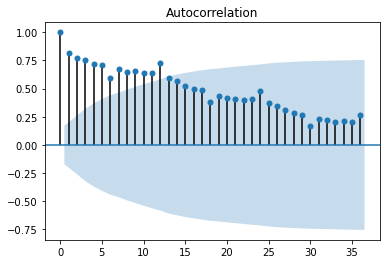

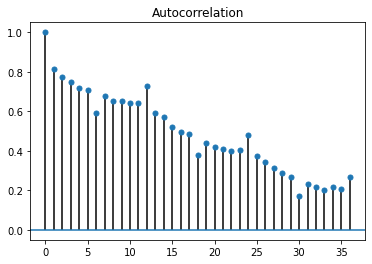

In [289]:
# autocorrelation function (ACF) plot import
from statsmodels.graphics.tsaplots import plot_acf

# Generate the ACF plot on data -- choose the number of lags on your own
plot_acf(dal_hou['passengers'], lags=36, alpha=0.05);

# Generate the ACF plot on data -- Set alpha to None to remove the default confidence interval 95% (0.05)
plot_acf(dal_hou['passengers'], lags=36, alpha=None);

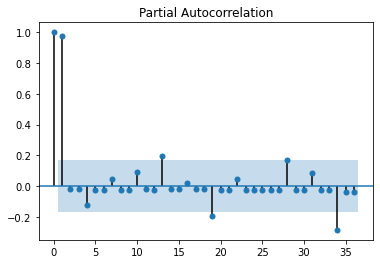

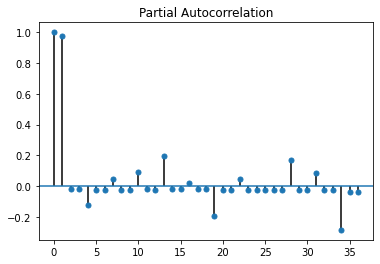

In [291]:
# Import the partial autocorrelation function (PACF) plot.
from statsmodels.graphics.tsaplots import plot_pacf

# blue area shows 95% confidence interval & anything outside the blue band is a statistically significant correlation.
plot_pacf(dal_hou['airfare'], lags=36, alpha=0.05)
plot_pacf(dal_hou['airfare'], lags=36, alpha=None);

#### Conclusions - PASSENGERS
- **ACF Trend Detection:**  Looks like a trend does exist.  13 lags are above the shaded area
- **ACF Seasonality Detection:**  Looks like this ACF plot shows seasonality every 6 and 12 months
- **PACF Seasonality Detection:** Looks like the PACF plot shows seasonality every 15 months.

# Pre-Processing / Feature Creation